# 08. 순환 신경망(Recurrent Neural Network)
- 다양한 길이의 입력 시퀀스를 처리할 수 있는 인공 신경망이 필요하게 되었는데, 자연어 처리에 대표적으로 사용되는 인공 신경망이 바로 순환 신경망(Recurrent Neural Network, RNN)
- 바닐라 RNN, 이를 개선한 LSTM, GRU 등

## 08-01 순환 신경망(Recurrent Neural Network, RNN)

### 1. 순환 신경망(Recurrent Neural Network, RNN)

### 2. 케라스(Keras)로 RNN 구현하기

- 케라스로 RNN 층을 추가하는 코드
```python
from tensorflow.keras.layers import SimpleRNN
model.add(SimpleRNN(hidden_units))
# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
# 다른 표기
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))
# hidden_units = 은닉 상태의 크기 정의
# timesteps = 입력 시퀀스의 길이
# input_dim = 입력의 크기

```

- 전결합층(Fully-connected layer)을 출력층으로 사용하였을 경우의 인공 신경망 그림과 은닉층까지만 표현한 그림의 차이
    ![img](https://wikidocs.net/images/page/22886/rnn_image7_ver2.PNG)
    - RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냄
    - 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴
    - 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴

- time step=3 일때, return sequence를 true로 설정했을때와 아닐때
    ![img](https://wikidocs.net/images/page/22886/rnn_image8_ver2.PNG)
    - 마지막 은닉 상태만 전달하도록 하면 다 대 일(many-to-one) 문제
    - 모든 시점의 은닉 상태를 전달하도록 하면, 다음층에 RNN 은닉층이 하나 더 있는 경우이거나 다 대 다(many-to-many) 문제


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [58]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [59]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 3. 파이썬으로 RNN 구현하기

- 은닉상태 계산식: $h_{t} = tanh(W_{x}X_{t} + W_{h}h_{t−1} + b)$

```
# 아래의 코드는 가상의 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
```

In [60]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [62]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

    # Wx * Xt + Wh * Ht-1 + b(bias)
    output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

    # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
    # 각 시점의 은닉 상태의 값을 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.95723376 0.97083176 0.96339037 0.97578651 0.97611529 0.97986073
  0.97935171 0.98897943]
 [0.99980673 0.99999319 0.99996078 0.99939939 0.99915935 0.99996008
  0.99888921 0.99974277]
 [0.99995143 0.99999938 0.99999581 0.99994055 0.99979731 0.99999613
  0.99995832 0.99997763]
 [0.99993707 0.99999668 0.99999539 0.99976229 0.99967089 0.99999399
  0.99983237 0.99997062]
 [0.99956317 0.99999473 0.9999753  0.99958324 0.99948361 0.99992979
  0.99948159 0.99961871]
 [0.99987167 0.99999774 0.99999074 0.99981201 0.99969972 0.99998349
  0.99982097 0.99991404]
 [0.99981691 0.99999283 0.99998947 0.99951428 0.99937936 0.99998218
  0.99959926 0.99990502]
 [0.99978153 0.9999955  0.99997007 0.99957077 0.99915283 0.99996924
  0.99935005 0.99977703]
 [0.99987728 0.99999554 0.99998523 0.99962354 0.99961693 0.99997497
  0.99947916 0.99986865]
 [0.99986423 0.99999774 0.99999288 0.99982605 0.99969817 0.99998654
  0.9998682  0.999932  ]]


### 4. 깊은 순환 신경망(Deep Recurrent Neural Network)
- 은닉층이 2개인 깊은 순환 신경망
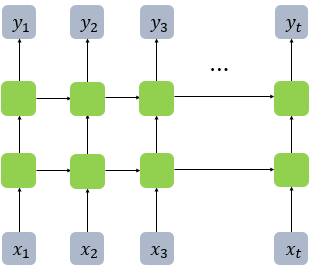

In [63]:
# 은닉층 2개 추가 코드
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))

### 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
- 양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여할 수 있다는 아이디어에 기반
- 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 것이 양방향 RNN
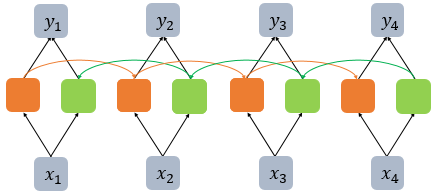
- 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States) 를 전달받아 현재의 은닉 상태를 계산
- 두번째 메모리 셀은 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 현재의 은닉 상태를 계산
- 두 개의 값 모두가 현재 시점의 출력층에서 출력값을 예측하기 위해 사용

In [64]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

- 양방향 RNN도 다수의 은닉층 가질 수 있음
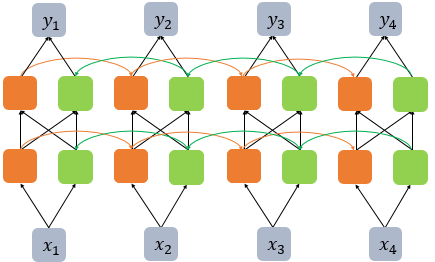
- 은닉층을 무조건 추가한다고 해서 반드시 성능 향상X

```python
# 은닉층이 4개인 경우
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
```

### 6. 점검 퀴즈

RNN을 제대로 이해했는지 퀴즈를 통해서 확인해보세요! 모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요.

1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
2. 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
5. 은닉층은 1개입니다.

#### 정답
Embedding = 5,000(input) * 100(embedding) = 500,000
$W_x$ = 100(embedding) * 128(hidden) = 12,800
$W_h$ = 128 * 128 = 16,384
bias(hidden)  = 128
$W_y$ = 128
bias(output) = 1

total = 529,441

## 08-02 장단기 메모리(Long Short-Term Memory, LSTM)

### 1. 바닐라 RNN의 한계
- 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점
- 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생
- 이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 함

### 2. 바닐라 RNN 내부 열어보기

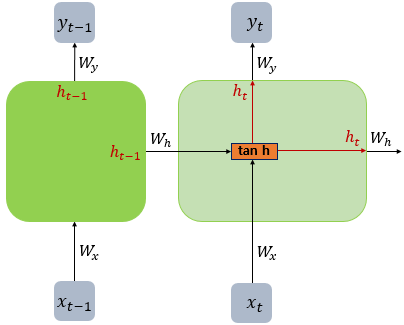
$h_{t} = tanh(W_{x}x_{t} + W_{h}h_{t−1} + b)$

- 바닐라 RNN은 $x_{t}$와 $h_{t-1}$이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 됨
- 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 됨

### 3. LSTM(Long Short-Term Memory)
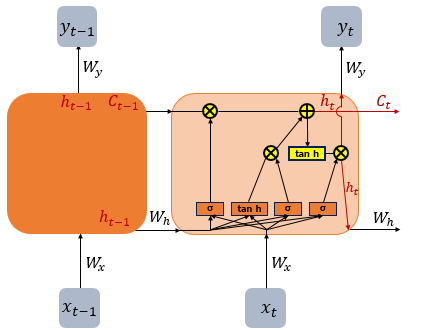
- 이하 식에서 σ는 시그모이드 함수를 의미합니다.
- 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수를 의미합니다.
- $W_{xi}, W_{xg}, W_{xf}, W_{xo}$는 $x_{t}$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
- $W_{hi}, W_{hg}, W_{hf}, W_{ho}$는 $h_{t-1}$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
- $b_{i}, b_{g}, b_{f}, b_{o}$는 각 게이트에서 사용되는 4개의 편향입니다.

#### (1) 입력 게이트
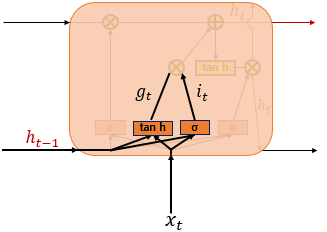
$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$
$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$
- 입력 게이트는 현재 정보를 기억하기 위한 게이트

#### (2) 삭제 게이트
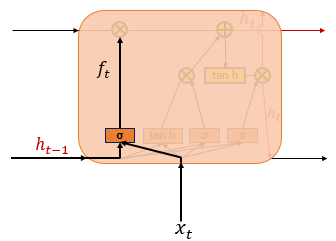
$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$
- 삭제 게이트는 기억을 삭제하기 위한 게이트

#### (3) 셀 상태
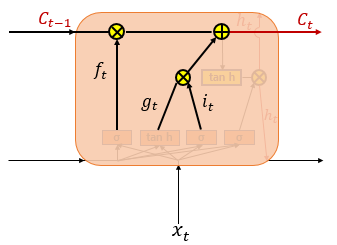
$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$
- 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더한 값을 현재 시점 t의 셀 상태라고 함

#### (4) 출력 게이트와 은닉 상태
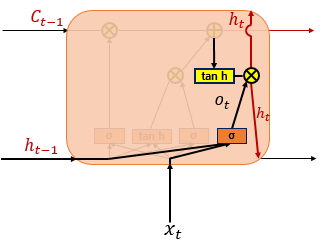
$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$
$h_{t}=o_{t}∘tanh(c_{t})$
- 현재 시점 t의 값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값

## 08-03 게이트 순환 유닛(Gated Recurrent Unit, GRU)

### 1. GRU(Gated Recurrent Unit)
- GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재
- GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만 여러 평가에서 GRU는 LSTM과 비슷한 성능을 보임

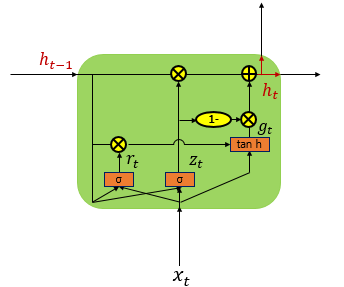
$r_{t}=σ(W_{xr}x_{t}+W_{hr}h_{t-1}+b_{r})$

$z_{t}=σ(W_{xz}x_{t}+W_{hz}h_{t-1}+b_{z})$

$g_{t}=tanh(W_{hg}(r_{t}∘h_{t-1})+W_{xg}x_{t}+b_{g})$

$h_{t}=(1-z_{t})∘g_{t}+z_{t}∘h_{t-1}$

- 기존에 LSTM을 사용하면서 최적의 하이퍼파라미터를 찾아낸 상황이라면 굳이 GRU로 바꿔서 사용할 필요X
- 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다

### 2. 케라스에서의 GRU(Gated Recurrent Unit)

```python
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))
```

## 08-04 케라스의 SimpleRNN과 LSTM 이해하기

### 1. 임의의 입력 생성하기

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [66]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [67]:
# 2D + 3D 배치크기 1 추가하면서 변경
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


### 2. SimpleRNN 이해하기

In [68]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.9871459  -0.98347044 -0.9918319 ]], shape: (1, 3)


In [69]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.560688    0.9510208   0.43291962]
  [-0.5594747  -0.5615538  -0.19294041]
  [-0.94330806  0.4787041  -0.9802159 ]
  [-0.7283928   0.9067716  -0.6599525 ]]], shape: (1, 4, 3)


In [70]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.9878115  -0.66011965  0.7909376 ]
  [ 0.3395598  -0.7565601   0.7405062 ]
  [ 0.9610405   0.38693392  0.783265  ]
  [-0.87784016  0.66607714  0.7644371 ]]], shape: (1, 4, 3)
last hidden state : [[-0.87784016  0.66607714  0.7644371 ]], shape: (1, 3)


In [71]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[0.4190477  0.9626698  0.47311538]], shape: (1, 3)
last hidden state : [[0.4190477  0.9626698  0.47311538]], shape: (1, 3)


### 3. LSTM 이해하기

In [72]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[ 0.14525121 -0.3348044   0.05390321]], shape: (1, 3)
last hidden state : [[ 0.14525121 -0.3348044   0.05390321]], shape: (1, 3)
last cell state : [[ 0.52848446 -0.5242957   0.11324658]], shape: (1, 3)


In [73]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.24038522 -0.04655914 -0.0229241 ]
  [-0.24409054 -0.08092279 -0.08584433]
  [-0.4917218   0.18085417 -0.1651622 ]
  [-0.45524925  0.07358861 -0.10136613]]], shape: (1, 4, 3)
last hidden state : [[-0.45524925  0.07358861 -0.10136613]], shape: (1, 3)
last cell state : [[-0.6629719   0.09439407 -0.4864183 ]], shape: (1, 3)


### 4. Bidirectional(LSTM) 이해하기

In [74]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [75]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303139  0.6303139  0.6303139  0.70387346 0.70387346 0.70387346]], shape: (1, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)


- 위 코드 그림으로 설명
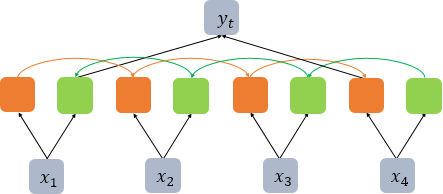

In [76]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906476 0.35906476 0.35906476 0.70387346 0.70387346 0.70387346]
  [0.5511133  0.5511133  0.5511133  0.5886358  0.5886358  0.5886358 ]
  [0.5911575  0.5911575  0.5911575  0.39516988 0.39516988 0.39516988]
  [0.6303139  0.6303139  0.6303139  0.2194224  0.2194224  0.2194224 ]]], shape: (1, 4, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)


- 위 코드 그림으로 설명
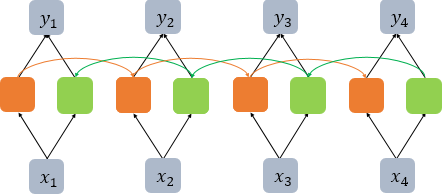

## 08-05 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

### 1. RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)
- 시점(time step)이라는 개념이 도입된 RNN으로 언어 모델을 만들면 입력의 길이를 고정하지 않아도 됨
- RNNLM: RNN으로 만든 언어모델

#### RNNLM이 언어 모델링 학습하는 과정
> 예문 : 'what will the fat cat sit on'

- RNNLM이 어떻게 이전 시점들의 단어들과 현재 시점의 단어로 다음 단어를 예측하는지 그림
    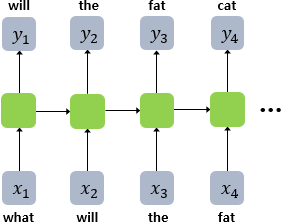
    - 기본적으로 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 함
    - 훈련이 끝난 모델의 테스트 과정 동안(실제 사용할 때): RNNLM은 what을 입력받으면, will을 예측하고 이 will은 다음 시점의 입력이 되어 the를 예측
    - 훈련 과정: what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면, will the fat cat sit on를 예측하도록 훈련
    - 교사 강요(teacher forcing): RNN의 훈련 기법
    - 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법
    - 훈련할 때 교사 강요를 사용할 경우, 실제 알고있는 정답을 t+1 시점의 입력으로 사용
    - 교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련
![img](https://wikidocs.net/images/page/46496/rnnlm2_final_final.PNG)
    - 모델이 예측한 값과 실제 레이블과의 오차를 계산하기 위해서 손실 함수로 크로스 엔트로피 함수를 사용

- RNNLM의 구조
![img](https://wikidocs.net/images/page/46496/rnnlm3_final.PNG)

    - 입력층(input layer)에서 RNNLM의 현 시점(timestep)은 4, 그래서 4번째 입력 단어인 fat의 원-핫 벡터가 입력
    - 출력층에서 모델이 예측해야하는 정답에 해당되는 단어 cat의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용될 예정
    - 이 오차로부터 손실함수를 사용해 인공 신경망이 학습

- 조금 더 구체적인 그림
![img](https://wikidocs.net/images/page/46496/rnnlm4_final.PNG)
    - 임베딩층: $e_{t} = lookup(x_{t})$
    - 은닉층: $h_{t} = tanh(W_{x} e_{t} + W_{h}h_{t−1} + b)$
    - 출력층: $\hat{y_{t}} = softmax(W_{y}h_{t} + b)$

## 08-06 RNN을 이용한 텍스트 생성(Text Generation using RNN)

### 1. RNN을 이용하여 텍스트 생성하기


samples|$X$|$y$		
---|---|---
1	|경마장에	|있는
2|	경마장에 있는	|말이
3|	경마장에 있는 말이	|뛰고
4|	경마장에 있는 말이 뛰고	|있다
5|	그의	|말이
6|	그의 말이|	법이다
7|	가는	|말이
8|	가는 말이|	고와야
9|	가는 말이 고와야|	오는
10|	가는 말이 고와야 오는	|말이
11	|가는 말이 고와야 오는 말이|	곱다

#### (1) 데이터에 대한 이해와 전처리

In [77]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [78]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [79]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1 # 패딩고려
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [80]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [81]:
# 훈련 데이터
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [82]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [83]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [84]:
# 전체를 최대길이인 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [85]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [86]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [87]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [88]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [89]:
# 원 핫 인코딩
y = to_categorical(y, num_classes=vocab_size)

In [90]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### (2) 모델 설계하기

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [92]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.5049 - accuracy: 0.0909 - 605ms/epoch - 605ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4890 - accuracy: 0.0909 - 19ms/epoch - 19ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4733 - accuracy: 0.0909 - 17ms/epoch - 17ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4577 - accuracy: 0.1818 - 17ms/epoch - 17ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4420 - accuracy: 0.2727 - 17ms/epoch - 17ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4263 - accuracy: 0.2727 - 17ms/epoch - 17ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4103 - accuracy: 0.3636 - 19ms/epoch - 19ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3939 - accuracy: 0.3636 - 16ms/epoch - 16ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3771 - accuracy: 0.3636 - 15ms/epoch - 15ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3596 - accuracy: 0.4545 - 18ms/epoch - 18ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3415 - accuracy: 0.3636 - 15ms/epoch - 15ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3225 - accuracy: 0.3636 - 16ms/epoch - 16ms/step
Epoch 13/200
1/1 - 0s - loss: 2.302

Epoch 103/200
1/1 - 0s - loss: 0.7090 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 104/200
1/1 - 0s - loss: 0.6972 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 105/200
1/1 - 0s - loss: 0.6856 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 106/200
1/1 - 0s - loss: 0.6741 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 107/200
1/1 - 0s - loss: 0.6629 - accuracy: 0.8182 - 10ms/epoch - 10ms/step
Epoch 108/200
1/1 - 0s - loss: 0.6518 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 109/200
1/1 - 0s - loss: 0.6409 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 110/200
1/1 - 0s - loss: 0.6302 - accuracy: 0.8182 - 13ms/epoch - 13ms/step
Epoch 111/200
1/1 - 0s - loss: 0.6196 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 112/200
1/1 - 0s - loss: 0.6093 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 113/200
1/1 - 0s - loss: 0.5990 - accuracy: 0.8182 - 11ms/epoch - 11ms/step
Epoch 114/200
1/1 - 0s - loss: 0.5890 - accuracy: 0.8182 - 12ms/epoch - 12ms/step
Epoch 115/200
1/

In [93]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [94]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [95]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [96]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


- 이 모델은 충분한 훈련 데이터를 갖고 있지 못하므로 위에서 문장의 길이에 맞게 적절하게 예측해야하는 횟수 4, 2, 5를 각각 인자값으로 줌
- 이 이상의 숫자를 주면 기계는 '있다', '법이다', '곱다' 다음에 나오는 단어가 무엇인지 배운 적이 없으므로 임의 예측을 함

### 2. LSTM을 이용하여 텍스트 생성하기

#### (1) 데이터에 대한 이해와 전처리

#### (2) 모델 설계하기

## 08-07 문자 단위 RNN(Char RNN)

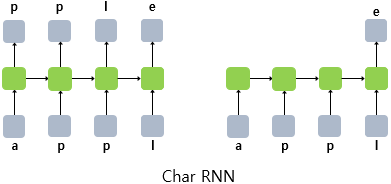


### 1. 문자 단위 RNN 언어 모델(Char RNNLM)

#### (1) 데이터에 대한 이해와 전처리

In [97]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [98]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

문자열의 길이 또는 총 문자의 개수: 159484


In [99]:
print(total_data[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [100]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 56


In [101]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

문자 집합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [102]:
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [103]:
# appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_X = 'appl'
train_y = 'pple'

In [104]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


In [105]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [106]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

In [107]:
print(train_X[1])
print(train_y[1])

[43, 33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54]
[33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54, 52]


In [108]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


#### (2) 모델 설계하기

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 3s - loss: 3.0720 - accuracy: 0.1811 - 3s/epoch - 37ms/step
Epoch 2/80
84/84 - 1s - loss: 2.7166 - accuracy: 0.2521 - 948ms/epoch - 11ms/step
Epoch 3/80
84/84 - 1s - loss: 2.3727 - accuracy: 0.3320 - 951ms/epoch - 11ms/step
Epoch 4/80
84/84 - 1s - loss: 2.2394 - accuracy: 0.3638 - 925ms/epoch - 11ms/step
Epoch 5/80
84/84 - 1s - loss: 2.1399 - accuracy: 0.3891 - 944ms/epoch - 11ms/step
Epoch 6/80
84/84 - 1s - loss: 2.0616 - accuracy: 0.4085 - 931ms/epoch - 11ms/step
Epoch 7/80
84/84 - 1s - loss: 1.9912 - accuracy: 0.4271 - 937ms/epoch - 11ms/step
Epoch 8/80
84/84 - 1s - loss: 1.9311 - accuracy: 0.4420 - 934ms/epoch - 11ms/step
Epoch 9/80
84/84 - 1s - loss: 1.8786 - accuracy: 0.4569 - 929ms/epoch - 11ms/step
Epoch 10/80
84/84 - 1s - loss: 1.8266 - accuracy: 0.4718 - 935ms/epoch - 11ms/step
Epoch 11/80
84/84 - 1s - loss: 1.7805 - accuracy: 0.4851 - 927ms/epoch - 11ms/step
Epoch 12/80
84/84 - 1s - loss: 1.7401 - accuracy: 0.4944 - 946ms/epoch - 11ms/step
Epoch 13/80
84/8

In [110]:
def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [111]:
result = sentence_generation(model, 100)
print(result)

34 번 문자 e 로 예측을 시작!
1/1 [==============================] - 0s 16ms/step
e who _you_ are, and what are you thing the queen had a groud fill of a watching or agrelly sigply wi


### 2. 문자 단위 RNN(Char RNN)으로 텍스트 생성하기

#### (1) 데이터에 대한 이해와 전처리

In [112]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [113]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [114]:
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [115]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


In [116]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [117]:
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [118]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [119]:
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

In [120]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [121]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [122]:
print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


In [123]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [124]:
print(X_data_one_hot.shape)

(426, 10, 33)


#### (2) 모델 설계하기

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100
14/14 - 1s - loss: 3.4803 - accuracy: 0.0634 - 1s/epoch - 90ms/step
Epoch 2/100
14/14 - 0s - loss: 3.4061 - accuracy: 0.1972 - 74ms/epoch - 5ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1784 - accuracy: 0.1972 - 78ms/epoch - 6ms/step
Epoch 4/100
14/14 - 0s - loss: 3.0303 - accuracy: 0.1972 - 77ms/epoch - 6ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9652 - accuracy: 0.1972 - 78ms/epoch - 6ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9441 - accuracy: 0.1972 - 86ms/epoch - 6ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9227 - accuracy: 0.1972 - 60ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9071 - accuracy: 0.1972 - 55ms/epoch - 4ms/step
Epoch 9/100
14/14 - 0s - loss: 2.8922 - accuracy: 0.1972 - 57ms/epoch - 4ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8737 - accuracy: 0.1972 - 54ms/epoch - 4ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8443 - accuracy: 0.1972 - 55ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8096 - accuracy: 0.1995 - 54ms/epoch - 4ms/step
Epoch 13/100
14/14 - 0s - 

In [126]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [127]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to use words about beer. But when I stop my tal
